In [6]:
from plotTools import *
file_name = "bodes/ApprovedBode.csv"

In [7]:
freqLog = []
gainDb = []
phase = []
with open(file_name) as f:
    for row in f:
        row = row.strip("\n")
        if row == "":
            continue
        freqLog.append(row.split(", ")[0])
        gainDb.append(row.split(", ")[1])
        phase.append(row.split(", ")[2])

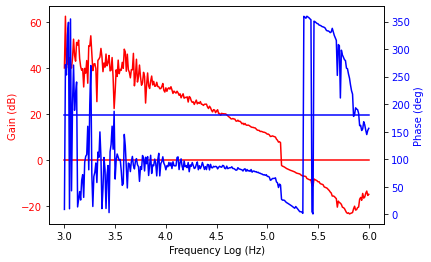

In [8]:
phase = [float(i) % 360 for i in phase[1:]]
freqLog = [float(i) for i in freqLog[1:]]
gainDb = [float(i) for i in gainDb[1:]]
gain = [np.exp(i/10) for i in gainDb]
tempL = np.zeros_like(phase)
tempL.fill(180)

plotTwo(freqLog, "Frequency Log (Hz)", [gainDb,np.zeros_like(gainDb)], "Gain (dB)", [phase,tempL], "Phase (deg)", "red", "blue")


0.33554817275747506


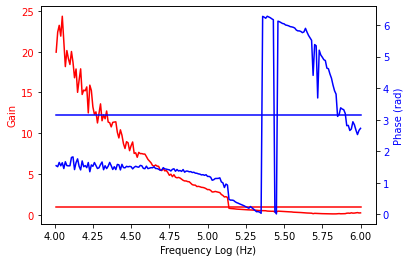

In [9]:
startIndex = 0
thresholdFrequency = 4
for i in range(len(freqLog)):
    if freqLog[i] > thresholdFrequency:
        startIndex = i
        break
print(startIndex/len(freqLog))
usablePhase = np.multiply(phase[startIndex:],np.pi/180)
usableGain = gain[startIndex:]
for i in range(len(usablePhase)):
    if usableGain[i] > 1 and abs(usablePhase[i] - 180) < 5:
        print("Error at "+str(freqLog[startIndex + i]))
tempL = np.zeros_like(usablePhase)
tempL.fill(np.pi)
tempL2 = np.zeros_like(usableGain)
tempL2.fill(1)
plotTwo(freqLog[startIndex:], "Frequency Log (Hz)", [usableGain,tempL2], "Gain", [usablePhase,tempL], "Phase (rad)", "red", "blue")

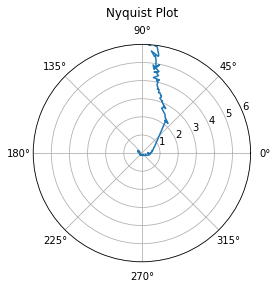

In [10]:
polarPlot(usablePhase, usableGain, "Nyquist Plot")